# **Drowsiness Detection :**

Driver drowsiness detection is a car safety technology which helps prevent accidents caused by the driver getting drowsy.

In this project we are using Dlib library for face landmark detection.

In [ ]:
#Importing Libraries:::>

import cv2 #Importing OpenCV Library for basic image processing functions
import numpy as np # Numpy for array related functions
import dlib # Dlib for deep learning based Modules and face landmark detection
from imutils import face_utils #face_utils for basic operations of conversion


In [ ]:
#Initializing the camera and taking the instance
cap = cv2.VideoCapture(0)

Here we are using 68 land mark detection.


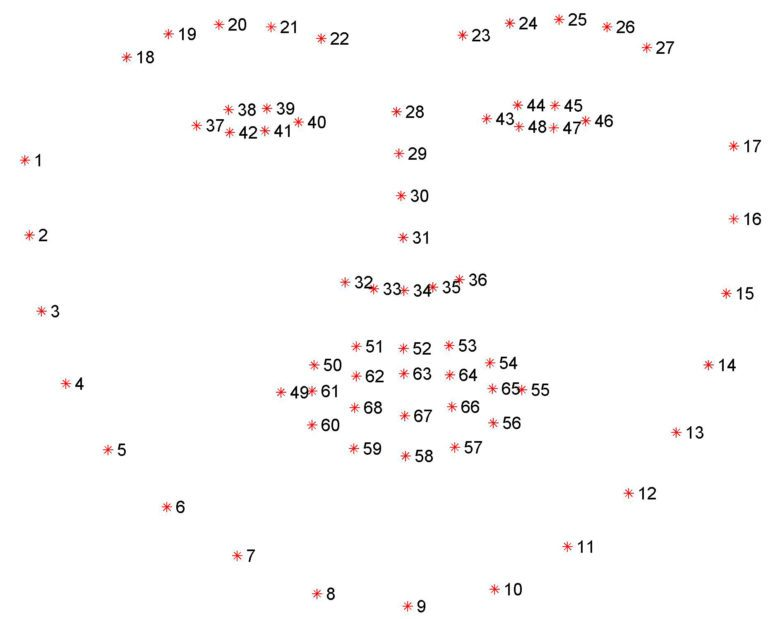

In [ ]:
detector = dlib.get_frontal_face_detector()    #Initializing the face detector 
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")   #Initializing the landmark detector

In [ ]:
#status marking for current state
sleep = 0
drowsy = 0
active = 0
status=""
color=(0,0,0)

In [ ]:
#Function to compute Euclidean distance:::>

def compute(ptA,ptB):
    dist = np.linalg.norm(ptA - ptB)
    return dist

Here we are calculating the distance and the ratio.
If the Eye Aspect ratio is lesst than 0.25, Alert is generated.

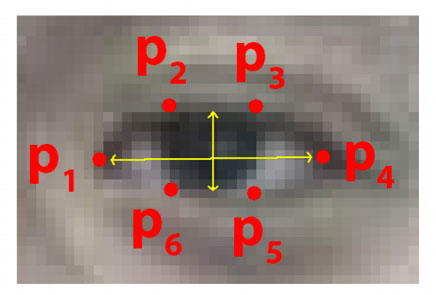


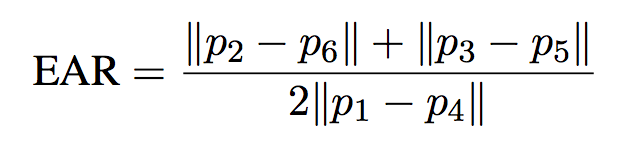

In [ ]:
#Function to compute Blink status::>

def blinked(a,b,c,d,e,f):
    up = compute(b,d) + compute(c,e)
    down = compute(a,f)
    ratio = up/(2.0*down)

    #Checking if it is blinked
    if(ratio>0.25):
        return 2
    elif(ratio>0.21 and ratio<=0.25):
        return 1
    else:
        return 0

In [ ]:
#Main body to show the frames and status:::>

while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    #detected face in faces array
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()

        face_frame = frame.copy()
        cv2.rectangle(face_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        landmarks = predictor(gray, face)
        landmarks = face_utils.shape_to_np(landmarks)

        #The numbers are actually the landmarks which will show eye
        left_blink = blinked(landmarks[36],landmarks[37], 
        	landmarks[38], landmarks[41], landmarks[40], landmarks[39])
        right_blink = blinked(landmarks[42],landmarks[43], 
        	landmarks[44], landmarks[47], landmarks[46], landmarks[45])
        
        #Now judge what to do for the eye blinks
        if(left_blink==0 or right_blink==0):
            sleep+=1
            drowsy=0
            active=0
            if(sleep>4):
                status="ALERT!!! SLEEPING !!"
                color = (255,0,0)

        elif(left_blink==1 or right_blink==1):
            sleep=0
            active=0
            drowsy+=1
            if(drowsy>4):
                status="Drowsy !"
                color = (0,0,255)

        else:
            drowsy=0
            sleep=0
            active+=1
            if(active>4):
                status="Active"
                color = (0,255,0)
            
        cv2.putText(frame, status, (100,100), cv2.FONT_HERSHEY_SIMPLEX, 1.2, color,3)

        for n in range(0, 68):
            (x,y) = landmarks[n]
            cv2.circle(face_frame, (x, y), 1, (255, 255, 255),-1)

    cv2.imshow("Frame", frame)
    cv2.imshow("Result of detector", face_frame)
    if cv2.waitKey(24) & 0xFF == ord('q'):
        break